In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

## First of all we performed Hinglish to English Text conversion using Excel Formula applied on google sheet of train and test dataset.
Using `=GoogleTranslate(A2, "hi", "en"`) in Google Sheets is one of the simplest and most accessible ways to translate text from Hinglish (a mix of Hindi and English, often written in the Latin script) or Hindi to English. However, its accuracy depends on several factors:
### Accuracy


 For Proper Hindi:
 * If the input text is in proper Hindi (written in Devanagari script), Google Translate performs well, especially for general, non-contextual translations. The accuracy is around 85-90%, depending on complexity.

 For Hinglish:

* Hinglish is challenging because it involves non-standard spelling, grammar variations, and informal expressions.
* While Google Translate does its best, its accuracy is generally lower for Hinglish, around 70-80%, as it wasn't explicitly designed to handle transliterated or mixed-language inputs.


### Comparison to Other Tools
**Microsoft Translator:**

*  Comparable in accuracy for standard Hindi but slightly weaker for Hinglish transliteration.
*  Offers more seamless integration into Microsoft Office products.

**DeepL Translator:**

*  Known for nuanced and context-aware translations, but currently supports limited languages and doesn't handle Hinglish well.




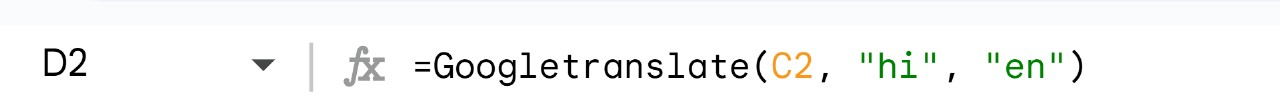
### The result of this formual is as ▶
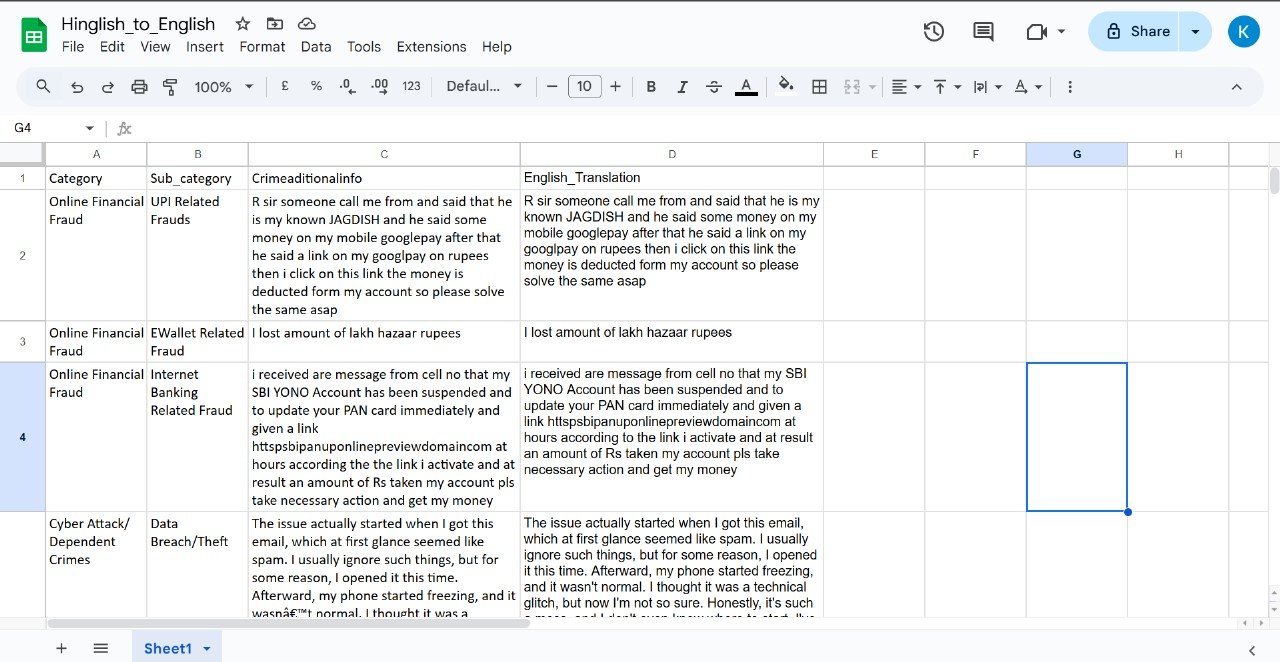

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Hackathon 24/Final_train.csv')

<ipython-input-9-8bef4e8963a6>:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Hackathon 24/Final_train.csv')


In [ ]:
df.head(30)

,category,sub_category,crimeaditionalinfo,English Senetences,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,I had continue received random calls and abusi...,NaN,NaN,NaN,NaN,NaN,NaN
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,The above fraudster is continuously messaging ...,NaN,NaN,NaN,NaN,NaN,NaN
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,He is acting like a police and demanding for m...,NaN,NaN,NaN,NaN,NaN,NaN
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,In apna Job I have applied for job interview f...,NaN,NaN,NaN,NaN,NaN,NaN
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,I received a call from lady stating that she w...,NaN,NaN,NaN,NaN,NaN,NaN
5,Online Financial Fraud,UPI Related Frauds,FRAUD \t UPI PAYTM \nBANK \tPunjab National Ba...,FRAUD UPI PAYTM \nBANK Punjab National Bank in...,NaN,NaN,NaN,NaN,NaN,NaN
6,Online Financial Fraud,Fraud CallVishing,Sir I am Prabhat Singh jat An app on playstor...,Sir I am Prabhat Singh Jat An app on playstore...,NaN,NaN,NaN,NaN,NaN,NaN
7,Online Financial Fraud,Internet Banking Related Fraud,FINANCIAL FRAUD RS,FINANCIAL FRAUD,NaN,NaN,NaN,NaN,NaN,NaN
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...,I got the message on Whatsapp to my number The...,NaN,NaN,NaN,NaN,NaN,NaN
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...,Details entered in pdf file Person posing as A...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define a text cleaning function
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove links
    text = re.sub(r'https:\/\/\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline and other non-word characters except dots
    text = re.sub(r'[^ \w\.]', '', text)
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Tokenize, lemmatize, remove stopwords, and filter out short words
    tokens = text.split()  # Split text into individual words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [ ]:
# Apply the cleaning function to the 'English Sentences' column
df['English Senetences'] = df['English Senetences'].apply(clean_text)


In [ ]:
df.head(30)

,category,sub_category,crimeaditionalinfo,English Senetences,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,continue received random call abusive message ...,NaN,NaN,NaN,NaN,NaN,NaN
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,fraudster continuously messaging asking pay mo...,NaN,NaN,NaN,NaN,NaN,NaN
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,acting like police demanding money adding sect...,NaN,NaN,NaN,NaN,NaN,NaN
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,apna job applied job interview telecalling res...,NaN,NaN,NaN,NaN,NaN,NaN
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,received call lady stating send new phone vivo...,NaN,NaN,NaN,NaN,NaN,NaN
5,Online Financial Fraud,UPI Related Frauds,FRAUD \t UPI PAYTM \nBANK \tPunjab National Ba...,fraud upi paytm bank punjab national bank incl...,NaN,NaN,NaN,NaN,NaN,NaN
6,Online Financial Fraud,Fraud CallVishing,Sir I am Prabhat Singh jat An app on playstor...,sir prabhat singh jat app playstore name rupee...,NaN,NaN,NaN,NaN,NaN,NaN
7,Online Financial Fraud,Internet Banking Related Fraud,FINANCIAL FRAUD RS,financial fraud,NaN,NaN,NaN,NaN,NaN,NaN
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...,got message whatsapp number message contains a...,NaN,NaN,NaN,NaN,NaN,NaN
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...,detail entered pdf file person posing army off...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter out rows where 'English Sentences' contains fewer than 5 words
df = df[df['English Senetences'].str.split().str.len() >= 3]

In [ ]:
df.head(30)

,category,sub_category,crimeaditionalinfo,English Senetences,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,continue received random call abusive message ...,NaN,NaN,NaN,NaN,NaN,NaN
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,fraudster continuously messaging asking pay mo...,NaN,NaN,NaN,NaN,NaN,NaN
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,acting like police demanding money adding sect...,NaN,NaN,NaN,NaN,NaN,NaN
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,apna job applied job interview telecalling res...,NaN,NaN,NaN,NaN,NaN,NaN
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,received call lady stating send new phone vivo...,NaN,NaN,NaN,NaN,NaN,NaN
5,Online Financial Fraud,UPI Related Frauds,FRAUD \t UPI PAYTM \nBANK \tPunjab National Ba...,fraud upi paytm bank punjab national bank incl...,NaN,NaN,NaN,NaN,NaN,NaN
6,Online Financial Fraud,Fraud CallVishing,Sir I am Prabhat Singh jat An app on playstor...,sir prabhat singh jat app playstore name rupee...,NaN,NaN,NaN,NaN,NaN,NaN
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...,got message whatsapp number message contains a...,NaN,NaN,NaN,NaN,NaN,NaN
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...,detail entered pdf file person posing army off...,NaN,NaN,NaN,NaN,NaN,NaN
10,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I received a Whatsapp number in Happn Dating a...,received whatsapp number happn dating app text...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/content/drive/MyDrive/Hackathon 24/cleaned_train_dataset1.csv', index=False)


This Python script processes a CSV file to replace abbreviations in a specific column with their full forms. It includes a dictionary of common abbreviations and their corresponding meanings and uses this to update the text in the dataset.

In [2]:
import pandas as pd
import re
# Define the dictionary of abbreviations and their full forms
abbreviations = {
    'usa': 'United States of America',
    'uk': 'United Kingdom',
    'eu': 'European Union',
    'asap': 'As Soon As Possible',
    'lol': 'Laugh Out Loud',
    'omg': 'Oh My God',
    'dm': 'Direct message',
    'brb': 'Be Right Back',
    'idk': 'I Don’t Know',
    'tbh': 'To Be Honest',
    'fyi': 'For Your Information',
    'afaik': 'As Far As I Know',
    'btw': 'By The Way',
    'diy': 'Do It Yourself',
    'faq': 'Frequently Asked Questions',
    'hr': 'Human Resources',
    'it': 'Information Technology',
    'nasa': 'National Aeronautics and Space Administration',
    'mba': 'Master of Business Administration',
    'cdc': 'Centers for Disease Control and Prevention',
    'nato': 'North Atlantic Treaty Organization',
    'ai': 'Artificial Intelligence',
    'ml': 'Machine Learning',
    'iot': 'Internet of Things',
    'phd': 'Doctor of Philosophy',
    'eta': 'Estimated Time of Arrival',
    'rip': 'Rest In Peace',
    'smh': 'Shaking My Head',
    'tba': 'To Be Announced',
    'tbd': 'To Be Determined',
    'wfh': 'Work From Home',
    'pos': 'Point of Sale',
    'cc': 'Carbon Copy',
    'bcc': 'Blind Carbon Copy',
    'gps': 'Global Positioning System',
    'ip': 'Internet Protocol',
    'tv': 'Television',
    'dm': 'Direct Message',
    'atm': 'At The Moment',
    'cpu': 'Central Processing Unit',
    'ram': 'Random Access Memory',
    'usb': 'Universal Serial Bus',
    'sql': 'Structured Query Language',
    'vpn': 'Virtual Private Network',
    'pov': 'Point Of View',
    'csr': 'Corporate Social Responsibility',
    'bio': 'Biological',
    'ngo': 'Non-Governmental Organization',
    'usd': 'United States Dollar',
    'gbp': 'British Pound Sterling',
    'eur': 'Euro',
    'pm': 'Prime Minister',
    'ceo': 'Chief Executive Officer',
    'cfo': 'Chief Financial Officer',
    'cto': 'Chief Technology Officer',
    'roi': 'Return On Investment',
    'kpi': 'Key Performance Indicator',
    'ok': 'Okay',
    'vs': 'Versus',
    'api': 'Application Programming Interface',
    'ui': 'User Interface',
    'ux': 'User Experience',
    'sm': 'Short Message Service',
    'rfid': 'Radio Frequency Identification',
    'q&a': 'Questions and Answers',
    'aka': 'Also Known As',
    'vsop': 'Very Superior Old Pale',
    'pc': 'Personal Computer',
    'lan': 'Local Area Network',
    'wan': 'Wide Area Network',
    'ftp': 'File Transfer Protocol',
    'html': 'HyperText Markup Language',
    'css': 'Cascading Style Sheets',
    'json': 'JavaScript Object Notation',
    'xml': 'Extensible Markup Language',
    'php': 'Hypertext Preprocessor',
    'sdk': 'Software Development Kit',
    'gui': 'Graphical User Interface',
    'erp': 'Enterprise Resource Planning',
    'crm': 'Customer Relationship Management',
    'hrm': 'Human Resource Management',
    'opec': 'Organization of the Petroleum Exporting Countries',
    'un': 'United Nations',
    'who': 'World Health Organization',
    'gdp': 'Gross Domestic Product',
    'ppp': 'Purchasing Power Parity',
    'fomo': 'Fear Of Missing Out',
    'jfk': 'John F. Kennedy',
    'bt': 'Bluetooth',
    'cd': 'Compact Disc',
    'dvd': 'Digital Versatile Disc',
    'wifi': 'Wireless Fidelity',
    'ipod': 'Internet Protocol on Demand',
    'led': 'Light Emitting Diode',
    'nfc': 'Near Field Communication',
    'poc': 'Proof Of Concept',
    'saas': 'Software As A Service',
    'paas': 'Platform As A Service',
    'iaas': 'Infrastructure As A Service',
    'vps': 'Virtual Private Server',
    'ssl': 'Secure Sockets Layer',
    'tls': 'Transport Layer Security',
    'url': 'Uniform Resource Locator',
    'seo': 'Search Engine Optimization',
    'sem': 'Search Engine Marketing',
    'ppm': 'Parts Per Million',
    'bpm': 'Beats Per Minute',
    'lmao': 'Laughing My Ass Off',
    'rofl': 'Rolling On The Floor Laughing',
    'imo': 'In My Opinion',
    'imho': 'In My Humble Opinion',
    'np': 'No Problem',
    'ttyl': 'Talk To You Later',
    'bff': 'Best Friends Forever',
    'g2g': 'Got To Go',
    'pls': 'Please',
    'thx': 'Thanks',
    'afk': 'Away From Keyboard',
    'nsfw': 'Not Safe For Work',
    'ltd': 'Limited',
    'inc': 'Incorporated',
    'pvt': 'Private',
    'plc': 'Public Limited Company',
    'fifo': 'First In, First Out',
    'lifo': 'Last In, First Out',
    'ppt': 'PowerPoint Presentation',
    'kwh': 'Kilowatt Hour',
    'rpm': 'Revolutions Per Minute',
    'sms': 'Short Message Service',
    'otp': 'One-Time Password',
    'svp': 'Silicon Valley Product',
    'oops': 'Object-Oriented Programming System',
    'mvc': 'Model View Controller',
    'pwa': 'Progressive Web App',
    'asp': 'Active Server Pages',
    'mfa': 'Multi-Factor Authentication',
    'dnd': 'Do Not Disturb',
    'eta': 'Estimated Time of Arrival',
    'atm': 'Automated Teller Machine',
    'irs': 'Internal Revenue Service',
    'tmi': 'Too Much Information',
    'wysiwyg': 'What You See Is What You Get',
    'pin': 'Personal Identification Number',
    'ip': 'Intellectual Property',
    'url': 'Uniform Resource Locator',
    'mod': 'Modification',
    'otp': 'One-Time Password',
    'tldr': 'Too Long; Didn’t Read',
    'bae': 'Before Anyone Else',
    'irl': 'In Real Life',
    'smh': 'Shaking My Head',
    'nvm': 'Never Mind',
    'gg': 'Good Game',
    'wp': 'Well Played',
    'eod': 'End of Day',
    'abc': 'Always Be Closing',
    'rsvp': 'Répondez S’il Vous Plaît (Please Respond)',
    'oof': 'Out Of Office',
    'yo': 'Your Own',
    'tbh': 'To Be Honest',
    'lmk': 'Let Me Know',
    'hmu': 'Hit Me Up',
    'rn': 'Right Now',
    'smth': 'Something',
    'msg': 'Message',
    'pov': 'Point Of View',
    'imo': 'In My Opinion',
    'ttys': 'Talk To You Soon',
    'aka': 'Also Known As',
    'asap': 'As Soon As Possible',
    'bday': 'Birthday',
    'covid': 'Coronavirus Disease',
    'pdf': 'Portable Document Format',
    'dns': 'Domain Name System',
    'isp': 'Internet Service Provider',
    'pos': 'Point Of Sale',
    'sku': 'Stock Keeping Unit',
    'bps': 'Bits Per Second',
    'kbps': 'Kilobits Per Second',
    'mbps': 'Megabits Per Second',
    'dpi': 'Dots Per Inch',
    'usb': 'Universal Serial Bus',
    'ipx': 'Internetwork Packet Exchange',
    'mvp': 'Most Valuable Player',
    'atm': 'At The Moment',
    'pm': 'Post Meridian (Afternoon)',
    'am': 'Ante Meridian (Morning)',
    'lhs': 'Left Hand Side',
    'rhs': 'Right Hand Side',
    'tl;dr': 'Too Long; Didn’t Read',
    'eof': 'End Of File',
    'socmed': 'Social Media',
    'mfa': 'Master of Fine Arts',
    'nps': 'Net Promoter Score',
    'b2b': 'Business To Business',
    'b2c': 'Business To Consumer',
    'sp': 'Service Provider',
    'sql': 'Structured Query Language',
    'tsp': 'Teaspoon',
    'tbsp': 'Tablespoon',
    'cm': 'Centimeter',
    'mm': 'Millimeter',
    'kg': 'Kilogram',
    'lb': 'Pound',
    'oz': 'Ounce',
    'ft': 'Foot',
    'yr': 'Year',
    'est': 'Eastern Standard Time',
    'pst': 'Pacific Standard Time',
    'gmt': 'Greenwich Mean Time',
    'utc': 'Coordinated Universal Time',
    'imo': 'International Maritime Organization',
    'lolz': 'Laugh Out Loud (slang)',
    'bbl': 'Be Back Later',
    'noc': 'No Objection Certificate'

}

# Function to replace abbreviations in a text (case-insensitive)
def replace_abbreviations(text):
    # Loop through each abbreviation and its full form
    for abbrev, full_form in abbreviations.items():
        # Use regular expression to replace the abbreviation in a case-insensitive manner
        text = re.sub(r'\b' + re.escape(abbrev) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text

# Load the CSV file
df = pd.read_csv('/content/cleaned_train_dataset1.csv')

# Check if 'English Sent' column exists
if 'English Senetences' not in df.columns:
    raise ValueError("The CSV file must contain an 'English Sent' column.")

# Apply the replacement function to the 'English Sent' column
df['Modified English Sent'] = df['English Senetences'].apply(lambda x: replace_abbreviations(str(x).lower()))  # Ensure lowercase input

# Save the updated CSV with the new column
df.to_csv('output.csv', index=False)

print("CSV file has been updated successfully!")

CSV file has been updated successfully!
